In [90]:
import json

json_open = open('bs_rs_try_0418_1.1.json', 'r', encoding="utf-8")
json_load = json.load(json_open)

print(json_load)

d = json_load
print(d.keys())

{'items': {'artifacts': [{'width': 30, 'url': '', 'visible': True, 'refs': '', 'fT': 'RS1', 'memo': '', 'id': 1, 'sT': '', 'pos': {'x': 569, 'y': 943}}, {'width': 30, 'url': '', 'visible': True, 'refs': '', 'fT': 'RS2', 'memo': '', 'id': 2, 'sT': '', 'pos': {'x': 421.000009906229, 'y': 748.9999992179993}}, {'width': 30, 'url': '', 'visible': True, 'refs': '', 'fT': 'RS3', 'memo': '', 'id': 3, 'sT': '', 'pos': {'x': 563.9999984661322, 'y': 525.9999982013984}}, {'width': 30, 'url': '', 'visible': True, 'refs': '', 'fT': 'RS4', 'memo': '', 'id': 4, 'sT': '', 'pos': {'x': 620.9999961014198, 'y': 327.99999882699905}}, {'width': 30, 'url': '', 'visible': True, 'refs': '', 'fT': 'RS5', 'memo': '', 'id': 5, 'sT': '', 'pos': {'x': 569, 'y': 101}}, {'width': 29, 'url': '', 'visible': True, 'refs': '', 'fT': 'BS1', 'memo': '', 'id': 6, 'sT': '', 'pos': {'x': 1145.0000012143119, 'y': 936.9999987487989}}, {'width': 29, 'url': '', 'visible': True, 'refs': '', 'fT': 'BS2', 'memo': '', 'id': 7, 'sT': 

In [91]:
# ノード情報

nodes = d["items"]["artifacts"]
nodes[1]

{'width': 30,
 'url': '',
 'visible': True,
 'refs': '',
 'fT': 'RS2',
 'memo': '',
 'id': 2,
 'sT': '',
 'pos': {'x': 421.000009906229, 'y': 748.9999992179993}}

In [92]:
# エッジ情報

arr = d["arrows"]["hasArtifactsOnly"]
arr[1]

{'url': '',
 'd1': {'listId': 1,
  'width': 30,
  'stageY': 801.9999992179993,
  'stageX': 1385.000009906229},
 'i1': 2,
 'refs': '',
 'd2': {'listId': 1,
  'width': 30,
  'stageY': 578.9999982013984,
  'stageX': 1527.9999984661322},
 'memo': '',
 'id': 2,
 'visible': True,
 'i2': 3}

#### データフレームに格納して３次元の可視化

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import re
# import japanize_matplotlib

In [94]:
pointx = nodes[1]['pos']['x']
pointy = nodes[1]['pos']['y']
print(pointx, pointy)

421.000009906229 748.9999992179993


In [97]:
lst = [[nodes[i]['id'], nodes[i]['fT'], nodes[i]['pos']['y'], nodes[i]['pos']['x']] for i in range(len(nodes))]
lst[:2]
df = pd.DataFrame(lst, columns =['id', 'fT', 'x', 'y'])
df

,id,fT,x,y
0,1,RS1,943.000000,569.000000
1,2,RS2,748.999999,421.000010
2,3,RS3,525.999998,563.999998
3,4,RS4,327.999999,620.999996
4,5,RS5,101.000000,569.000000
5,6,BS1,936.999999,1145.000001
6,7,BS2,746.999997,1147.000000
7,8,BS3,538.999996,1144.999999
8,9,BS4,307.999999,974.000011
9,10,BS5,98.999999,1143.000000


In [100]:
num = np.random.randint(1, 10, 12)
print(num)
df["num"] = num
print(df)

tf_r = df["fT"].str.contains("RS").to_list()
# tf_b = df["fT"].str.contains("BS").to_list()

for i in range(len(df)):
    if tf_r[i]:
        df.iloc[i, 4] = np.random.randint(6, 10)
    else:
        df.iloc[i, 4] = np.random.randint(1, 6)

df

[3 6 6 5 7 7 9 5 1 8 1 7]
    id    fT           x            y  num
0    1   RS1  943.000000   569.000000    3
1    2   RS2  748.999999   421.000010    6
2    3   RS3  525.999998   563.999998    6
3    4   RS4  327.999999   620.999996    5
4    5   RS5  101.000000   569.000000    7
5    6   BS1  936.999999  1145.000001    7
6    7   BS2  746.999997  1147.000000    9
7    8   BS3  538.999996  1144.999999    5
8    9   BS4  307.999999   974.000011    1
9   10   BS5   98.999999  1143.000000    8
10  11  RS2'  745.000000   757.999994    1
11  12  BS4'  310.000000  1319.999995    7


,id,fT,x,y,num
0,1,RS1,943.000000,569.000000,6
1,2,RS2,748.999999,421.000010,6
2,3,RS3,525.999998,563.999998,9
3,4,RS4,327.999999,620.999996,8
4,5,RS5,101.000000,569.000000,9
5,6,BS1,936.999999,1145.000001,2
6,7,BS2,746.999997,1147.000000,3
7,8,BS3,538.999996,1144.999999,4
8,9,BS4,307.999999,974.000011,3
9,10,BS5,98.999999,1143.000000,1


In [101]:
N = df["num"].sum()
df["pot"] = -np.log(df["num"]/N)
df

,id,fT,x,y,num,pot
0,1,RS1,943.000000,569.000000,6,2.367124
1,2,RS2,748.999999,421.000010,6,2.367124
2,3,RS3,525.999998,563.999998,9,1.961659
3,4,RS4,327.999999,620.999996,8,2.079442
4,5,RS5,101.000000,569.000000,9,1.961659
5,6,BS1,936.999999,1145.000001,2,3.465736
6,7,BS2,746.999997,1147.000000,3,3.060271
7,8,BS3,538.999996,1144.999999,4,2.772589
8,9,BS4,307.999999,974.000011,3,3.060271
9,10,BS5,98.999999,1143.000000,1,4.158883


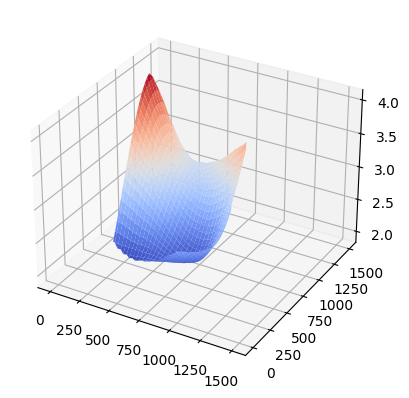

In [102]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = df["x"], df["y"], df["pot"]

points = np.array([X, Y]).T
# print(points)

# create a grid of coordinates between the minimum and
# maximum of your X and Y. 50j indicates 50 discretization
# points between the minimum and maximum.
X_grid, Y_grid = np.mgrid[1:1500:100j, 1:1500:100j]
# interpolate your values on the grid defined above
Z_grid = griddata(points, Z, (X_grid, Y_grid), method='cubic')

ax.plot_surface(X_grid, Y_grid, Z_grid, cmap=cm.coolwarm, 
                       linewidth=0, antialiased=True)

# Plot the 3D surface
# ax.plot_surface(X, Y, Z, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
#                 alpha=0.3)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph.
# ax.contour(X_grid, Y_grid, Z_grid, zdir='z', offset=-100, cmap='coolwarm')
# ax.contour(X_grid, Y_grid, Z_grid, zdir='x') #, offset=-40, cmap='coolwarm')
# ax.contour(X_grid, Y_grid, Z_grid, zdir='y', offset=40, cmap='coolwarm')

# ax.set(xlim=(0, 1500), ylim=(0, 1000), zlim=(-10, 10),
#        xlabel='X', ylabel='Y', zlabel='Z')

plt.show()

#### surface plotの例

[[-30.  -29.5 -29.  ...  28.5  29.   29.5]
 [-30.  -29.5 -29.  ...  28.5  29.   29.5]
 [-30.  -29.5 -29.  ...  28.5  29.   29.5]
 ...
 [-30.  -29.5 -29.  ...  28.5  29.   29.5]
 [-30.  -29.5 -29.  ...  28.5  29.   29.5]
 [-30.  -29.5 -29.  ...  28.5  29.   29.5]] 120
------
[[-0.00982064 -0.0113957  -0.01319036 ... -0.01522953 -0.01319036
  -0.0113957 ]
 [-0.0113957  -0.01322338 -0.01530587 ... -0.01767209 -0.01530587
  -0.01322338]
 [-0.01319036 -0.01530587 -0.01771632 ... -0.02045518 -0.01771632
  -0.01530587]
 ...
 [-0.01200234 -0.01414685 -0.01660867 ...  0.02918791  0.03019517
   0.03085725]
 [-0.01097235 -0.01288301 -0.01507265 ...  0.01583738  0.01709512
   0.01804782]
 [-0.00988645 -0.01157475 -0.01350698 ...  0.00702321  0.0083816
   0.00947216]] 120


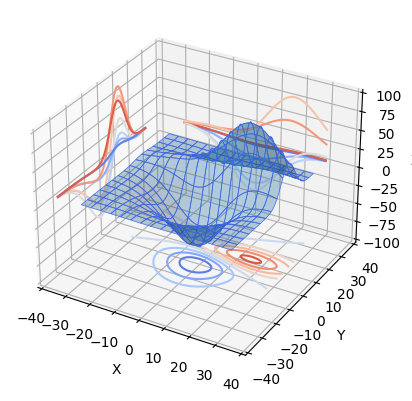

In [103]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
print(X, len(X[0]))
print("------")
print(Z, len(Z[0]))

# Plot the 3D surface
ax.plot_surface(X, Y, Z, edgecolor='royalblue', lw=0.5, rstride=8, cstride=8,
                alpha=0.3)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph.
ax.contour(X, Y, Z, zdir='z', offset=-100, cmap='coolwarm')
ax.contour(X, Y, Z, zdir='x', offset=-40, cmap='coolwarm')
ax.contour(X, Y, Z, zdir='y', offset=40, cmap='coolwarm')

ax.set(xlim=(-40, 40), ylim=(-40, 40), zlim=(-100, 100),
       xlabel='X', ylabel='Y', zlabel='Z')

plt.show()

### 3次元支持者の可視化

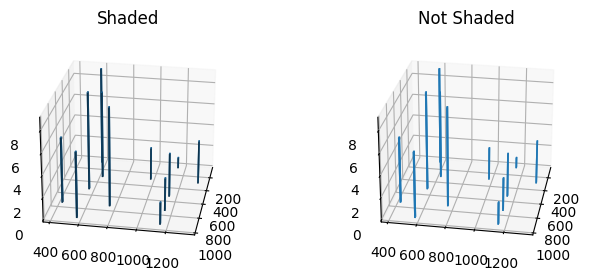

In [104]:
# set up the figure and axes
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

# # fake data
# _x = np.random.randint(1, 120, 12)
# _y = np.random.randint(1, 150, 12)
# _xx, _yy = np.meshgrid(_x, _y)
# x, y = _xx.ravel(), _yy.ravel()

x, y, z = df["x"], df["y"], df["num"]
# print(x, y, z)

top = z
bottom = np.zeros_like(top)
width = 20
depth = 10

ax1.bar3d(x, y, bottom, width, depth, top, shade=True)
ax1.set_title('Shaded')

ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
ax2.set_title('Not Shaded')

ax1.view_init(elev= 25, azim=10, roll=0)
ax2.view_init(elev= 25, azim=10, roll=0)

plt.show()

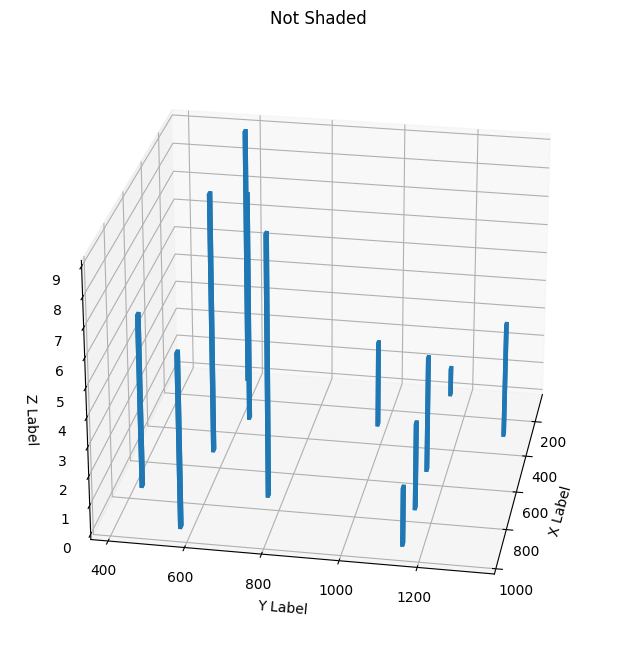

In [105]:
# set up the figure and axes
fig = plt.figure(figsize=(8, 8))
ax2 = fig.add_subplot(111, projection='3d')

x, y, z = df["x"], df["y"], df["num"]
# print(x, y, z)

top = z
bottom = np.zeros_like(top)
width = 20
depth = 10

ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
ax2.set_title('Not Shaded')
ax2.view_init(elev= 25, azim=10, roll=0)
ax2.set_xlabel('X Label')
ax2.set_ylabel('Y Label')
ax2.set_zlabel('Z Label')

plt.show()

### 座標付きネットワークの可視化

In [106]:
# エッジリストの作成
rels = []

for i in range(len(arr)):
  rels.append([arr[i]["i1"], arr[i]["i2"]])

{1: array([943., 569.], dtype=float32), 2: array([749., 421.], dtype=float32), 3: array([526., 564.], dtype=float32), 4: array([328., 621.], dtype=float32), 5: array([101., 569.], dtype=float32), 6: array([ 937., 1145.], dtype=float32), 7: array([ 747., 1147.], dtype=float32), 8: array([ 539., 1145.], dtype=float32), 9: array([308., 974.], dtype=float32), 10: array([  99., 1143.], dtype=float32), 11: array([745., 758.], dtype=float32), 12: array([ 310., 1320.], dtype=float32)}


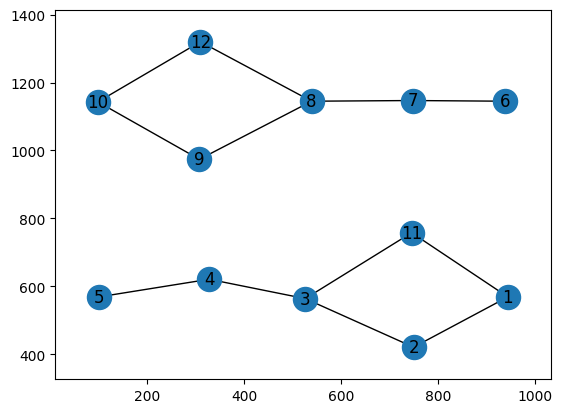

In [107]:
G = nx.Graph()
G.add_edges_from(rels)
pos = {df["id"][i] : np.array([df["x"][i], df["y"][i]], dtype=np.float32) for i in range(len(df))}
print(pos)
# coords = np.array(list(pos.values()))
# print(coords, type(coords))

fig, ax = plt.subplots()
plt.subplot(111)
nx.draw_networkx(G, pos, with_labels=True)
plt.axis('on'); plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True) #force axis to turn on
plt.show()

##### 例

{0: array([0.02203177, 0.4901507 ], dtype=float32), 1: array([0.76295537, 0.8897685 ], dtype=float32), 2: array([0.289541  , 0.38108793], dtype=float32), 3: array([0.27033854, 0.6225242 ], dtype=float32), 4: array([0.5195749 , 0.51692295], dtype=float32)}
[[0.02203177 0.4901507 ]
 [0.76295537 0.8897685 ]
 [0.289541   0.38108793]
 [0.27033854 0.6225242 ]
 [0.5195749  0.51692295]] <class 'numpy.ndarray'>


C:\Users\Sophia\AppData\Local\Temp\ipykernel_12204\2596622035.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


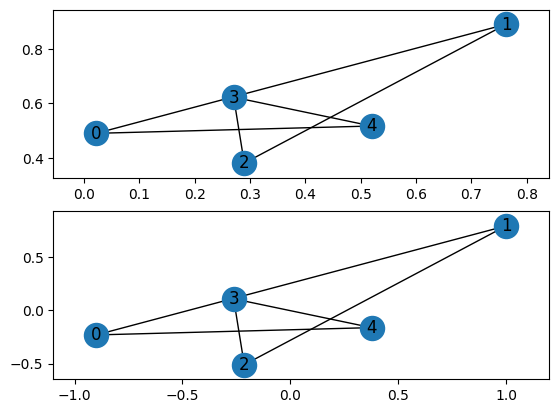

In [108]:
# https://stackoverflow.com/questions/63496724/how-to-use-networkxs-rescale-layout

G = nx.Graph()
G.add_edges_from([[0,1],[1,2],[2,3],[3,4],[4,0]])
pos = nx.random_layout(G)
coords = np.array(list(pos.values()))
# print(type(coords))
print(pos)
print(coords, type(coords))

fig, ax = plt.subplots()
plt.subplot(211)
nx.draw_networkx(G, pos, with_labels=True)
plt.axis('on'); plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True) #force axis to turn on

plt.subplot(212)
new_pos = nx.rescale_layout(coords)
nx.draw_networkx(G, new_pos, with_labels=True)
plt.axis('on'); plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True) #force axis turn on
plt.show()

## まとめて可視化

In [111]:
# エッジリストの作成
rels = []

for i in range(len(arr)):
  rels.append([arr[i]["i1"], arr[i]["i2"]])

{1: array([943., 569.], dtype=float32), 2: array([749., 421.], dtype=float32), 3: array([526., 564.], dtype=float32), 4: array([328., 621.], dtype=float32), 5: array([101., 569.], dtype=float32), 6: array([ 937., 1145.], dtype=float32), 7: array([ 747., 1147.], dtype=float32), 8: array([ 539., 1145.], dtype=float32), 9: array([308., 974.], dtype=float32), 10: array([  99., 1143.], dtype=float32), 11: array([745., 758.], dtype=float32), 12: array([ 310., 1320.], dtype=float32)}


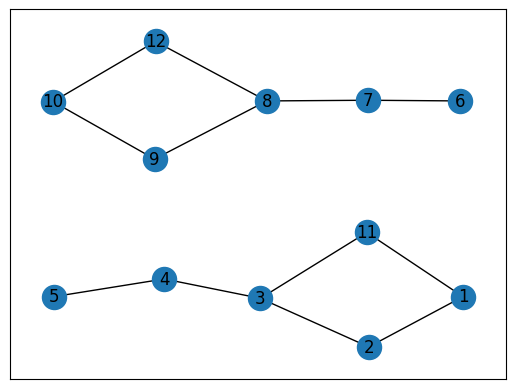

In [109]:
G = nx.Graph()
G.add_edges_from(rels)
pos = {df["id"][i] : np.array([df["x"][i], df["y"][i]], dtype=np.float32) for i in range(len(df))}
print(pos)
# coords = np.array(list(pos.values()))
# print(coords, type(coords))

fig, ax = plt.subplots()
plt.subplot(111)
nx.draw_networkx(G, pos, with_labels=True)
# plt.axis('on'); plt.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True) #force axis to turn on
plt.show()

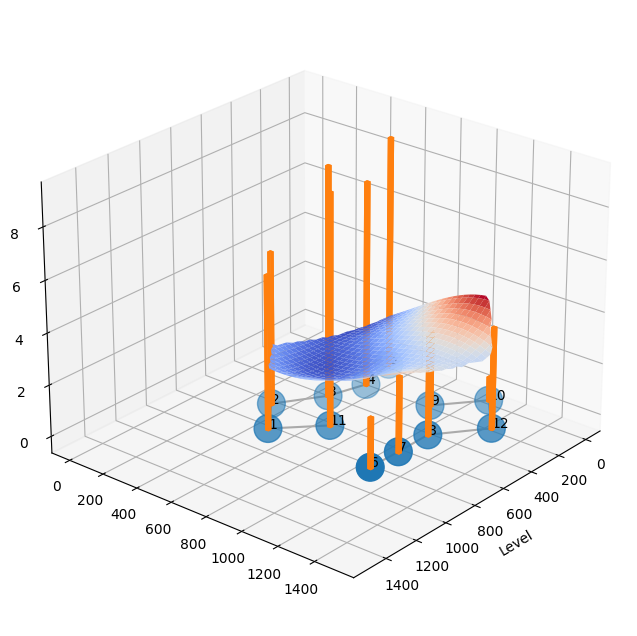

In [116]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

G = nx.Graph()
G.add_edges_from(rels)

pos = {df["id"][i] : np.array([df["x"][i], df["y"][i], 0], dtype=np.float32) for i in range(len(df))}
# print(pos)
pos_ary = np.array([pos[n] for n in G])
# print(pos_ary)

# set up the figure and axes
fig = plt.figure(figsize=(8, 8))
ax2 = fig.add_subplot(111, projection='3d')

ax2.scatter(
    pos_ary[:, 0],
    pos_ary[:, 1],
    pos_ary[:, 2],
    s=400,
)

# ノードにラベルを表示する
for n in G.nodes:
    ax2.text(*pos[n], n)

# エッジの表示
for e in G.edges:
    node0_pos = pos[e[0]]
    node1_pos = pos[e[1]]
    xx = [node0_pos[0], node1_pos[0]]
    yy = [node0_pos[1], node1_pos[1]]
    zz = [node0_pos[2], node1_pos[2]]
    ax2.plot(xx, yy, zz, c="#aaaaaa")

# bar graph code
x, y, z = df["x"], df["y"], df["num"]
# print(x, y, z)
top = z
bottom = np.zeros_like(top)
width = 20
depth = 20
ax2.bar3d(x, y, bottom, width, depth, top, shade=False)
# ax2.set_title('支持者数')

# surface plot code
X, Y, Z = df["x"], df["y"], df["pot"]

points = np.array([X, Y]).T

# create a grid of coordinates between the minimum and
# maximum of your X and Y. 50j indicates 50 discretization
# points between the minimum and maximum.
X_grid, Y_grid = np.mgrid[1:1500:100j, 1:1500:100j]
# interpolate your values on the grid defined above
Z_grid = griddata(points, Z, (X_grid, Y_grid), method='cubic')

ax2.plot_surface(X_grid, Y_grid, Z_grid, cmap=cm.coolwarm, 
                       linewidth=0, antialiased=True)

ax2.view_init(elev= 25, azim=40, roll=0)

ax2.set_xlabel('Level')
# ax2.set_ylabel('Y Label')
ax2.set_zlabel('Z')

plt.savefig("bs_rs_try_0418.png")
plt.show()